In [1]:
from matplotlib import  pyplot as   plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
data=pd.read_csv(os.path.join(".","neo.csv"))

In [3]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
# Correlation Between Hazardous column and other columns.
corr_matrix = data.corr()
corr_matrix["hazardous"].sort_values(ascending=False)

hazardous             1.000000
relative_velocity     0.191185
est_diameter_max      0.183363
est_diameter_min      0.183363
miss_distance         0.042302
id                   -0.123443
absolute_magnitude   -0.365267
sentry_object              NaN
Name: hazardous, dtype: float64

In [7]:
# Dropping the irrelavant feature
X = data.drop(['id','name','orbiting_body','sentry_object','hazardous'],axis=1)
print(X.shape)

(90836, 5)


In [87]:
# Data cleaning

In [9]:
Y = LabelEncoder()
y = data['hazardous']
Y = Y.fit_transform(y)
print(Y)

[0 1 0 ... 0 0 0]


In [10]:
# Splitting the data in to train test
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.5)

In [11]:
# Fitting in to the Decision Tree model
model_DTC=DecisionTreeClassifier()
#print(model_DTC)
model_DTC.fit(X_train,Y_train)
prediction = model_DTC.predict(x_test)
print(prediction)
print(y_test)

[0 1 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


array([[<AxesSubplot:title={'center':'est_diameter_min'}>,
        <AxesSubplot:title={'center':'est_diameter_max'}>],
       [<AxesSubplot:title={'center':'relative_velocity'}>,
        <AxesSubplot:title={'center':'miss_distance'}>],
       [<AxesSubplot:title={'center':'absolute_magnitude'}>,
        <AxesSubplot:>]], dtype=object)

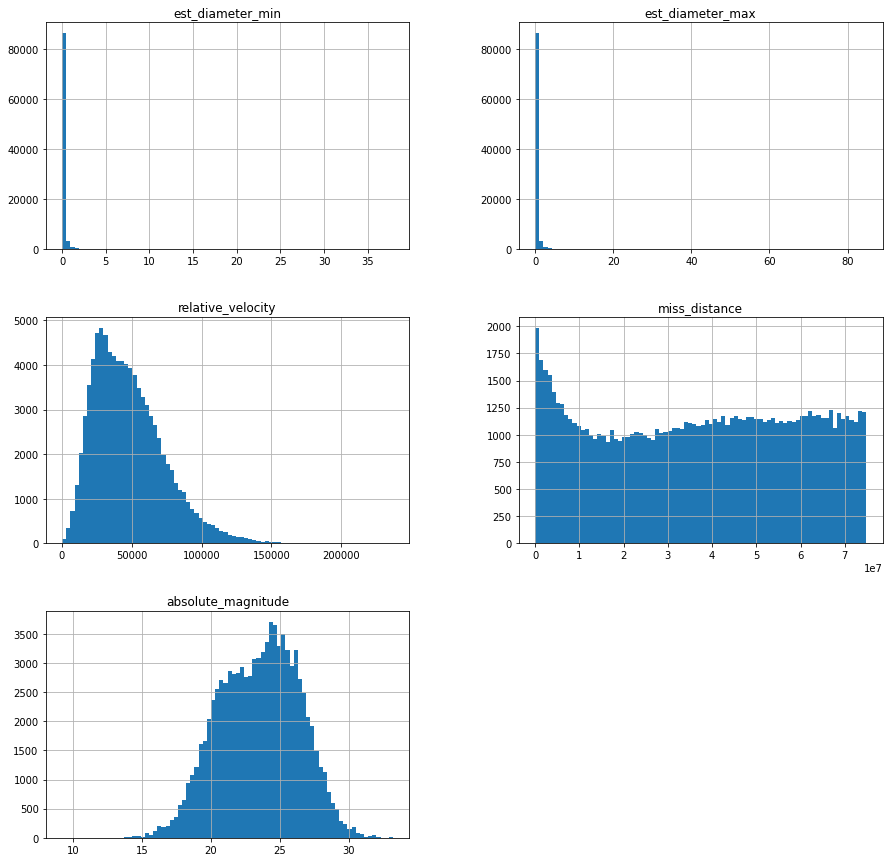

In [12]:
#data visualisation
# Histogram
%matplotlib inline
X.hist(bins=80, figsize=(15,15))

In [13]:
# To check the accuracy
accuracy= model_DTC.score(x_test,y_test)
print(accuracy)

0.8898454357303272


In [14]:
# Confusion matrix
#print(prediction)
#print(y_test)

confusion_model= pd.crosstab(prediction,y_test)
print(confusion_model)
print(classification_report(y_test,prediction))

col_0      0     1
row_0             
0      38443  2410
1       2593  1972
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     41036
           1       0.43      0.45      0.44      4382

    accuracy                           0.89     45418
   macro avg       0.69      0.69      0.69     45418
weighted avg       0.89      0.89      0.89     45418



In [84]:
#improvement in accuracy

KeyError: 'None of [RangeIndex(start=0, stop=90836, step=1)] are in the [columns]'

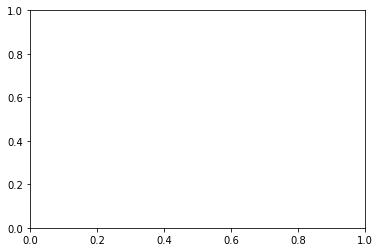

In [82]:
#Univariate analysis
mean_diameter = sum(X["est_diameter_min"], X["est_diameter_max"]) / 2
X_train.reset_index()
X_train.plot(
    kind="scatter",
    x=X.index,
    y="miss_distance",
    cmap="jet",
    s=mean_diameter * 0.1,
    c="absolute_magnitude"
)

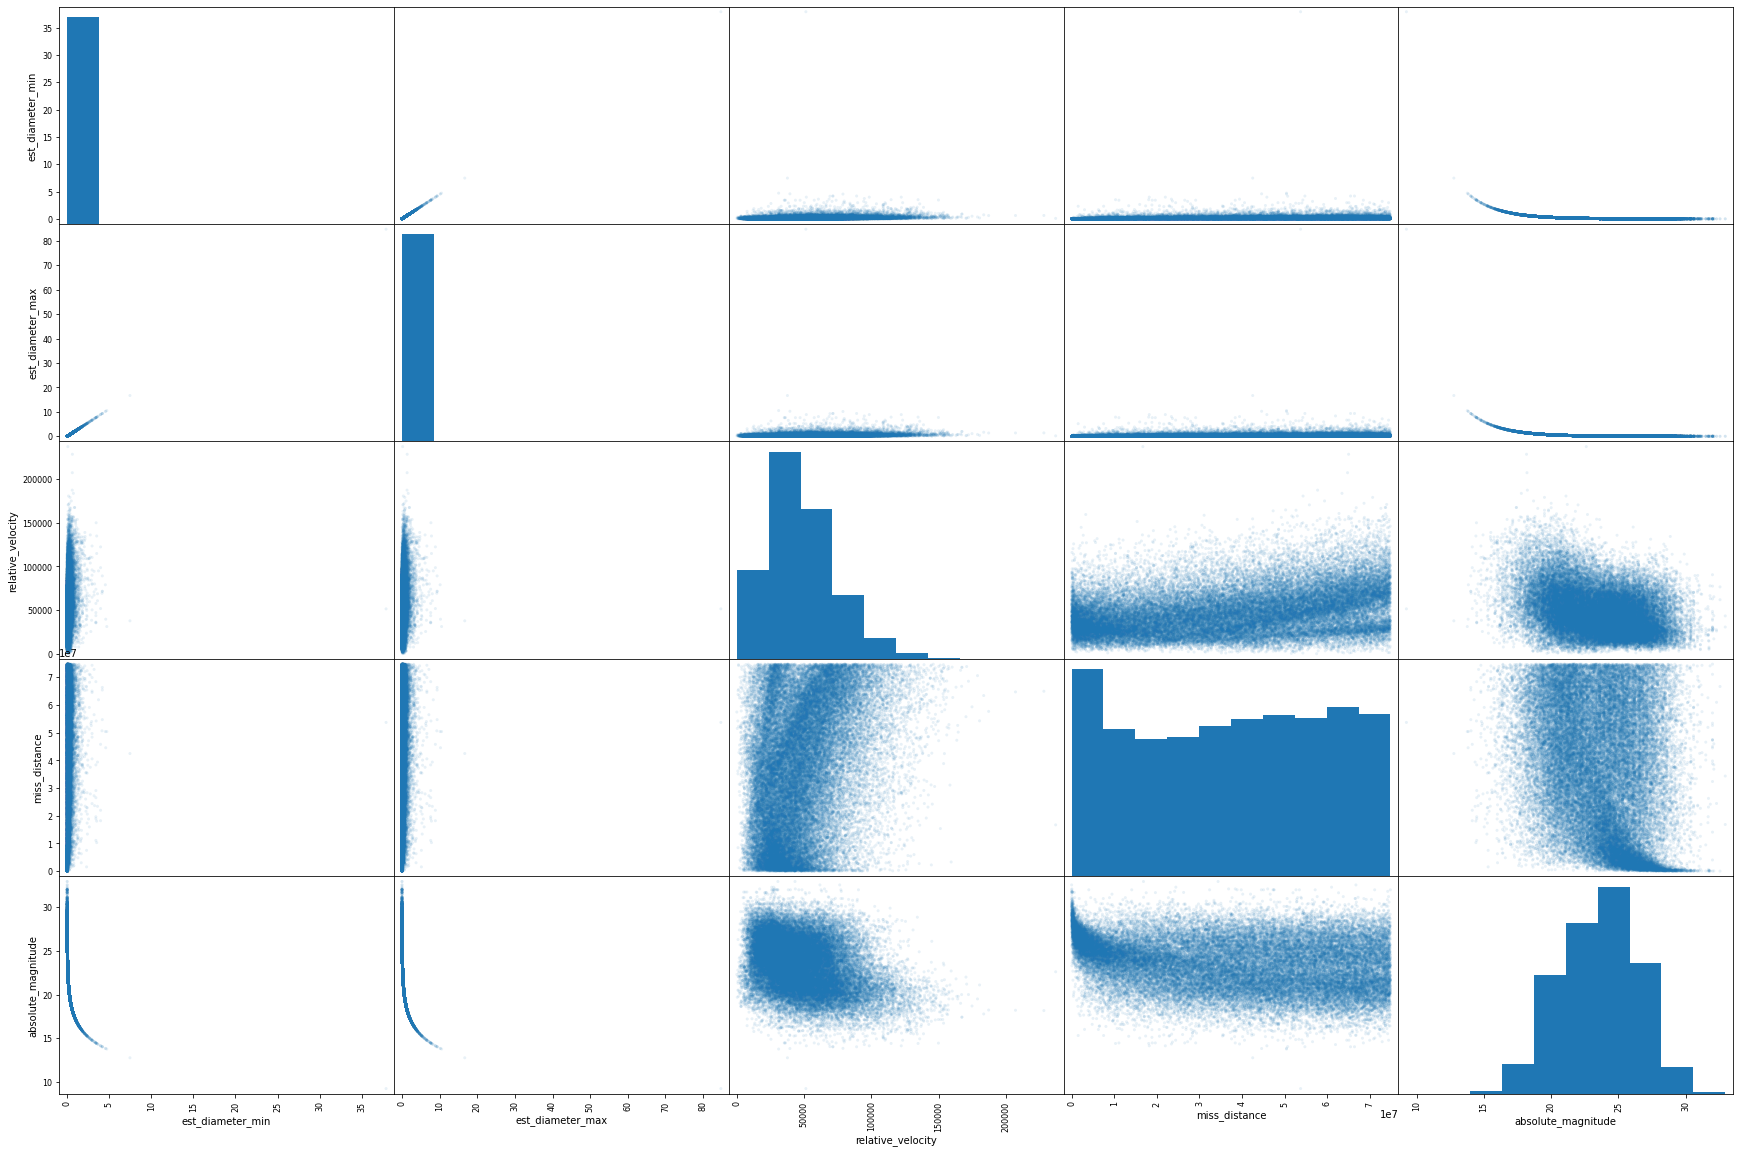

In [58]:
#Bivariate Analysis
from pandas.plotting import scatter_matrix
scatter_matrix(X_train, figsize=(30,20), alpha=0.1)
plt.show()

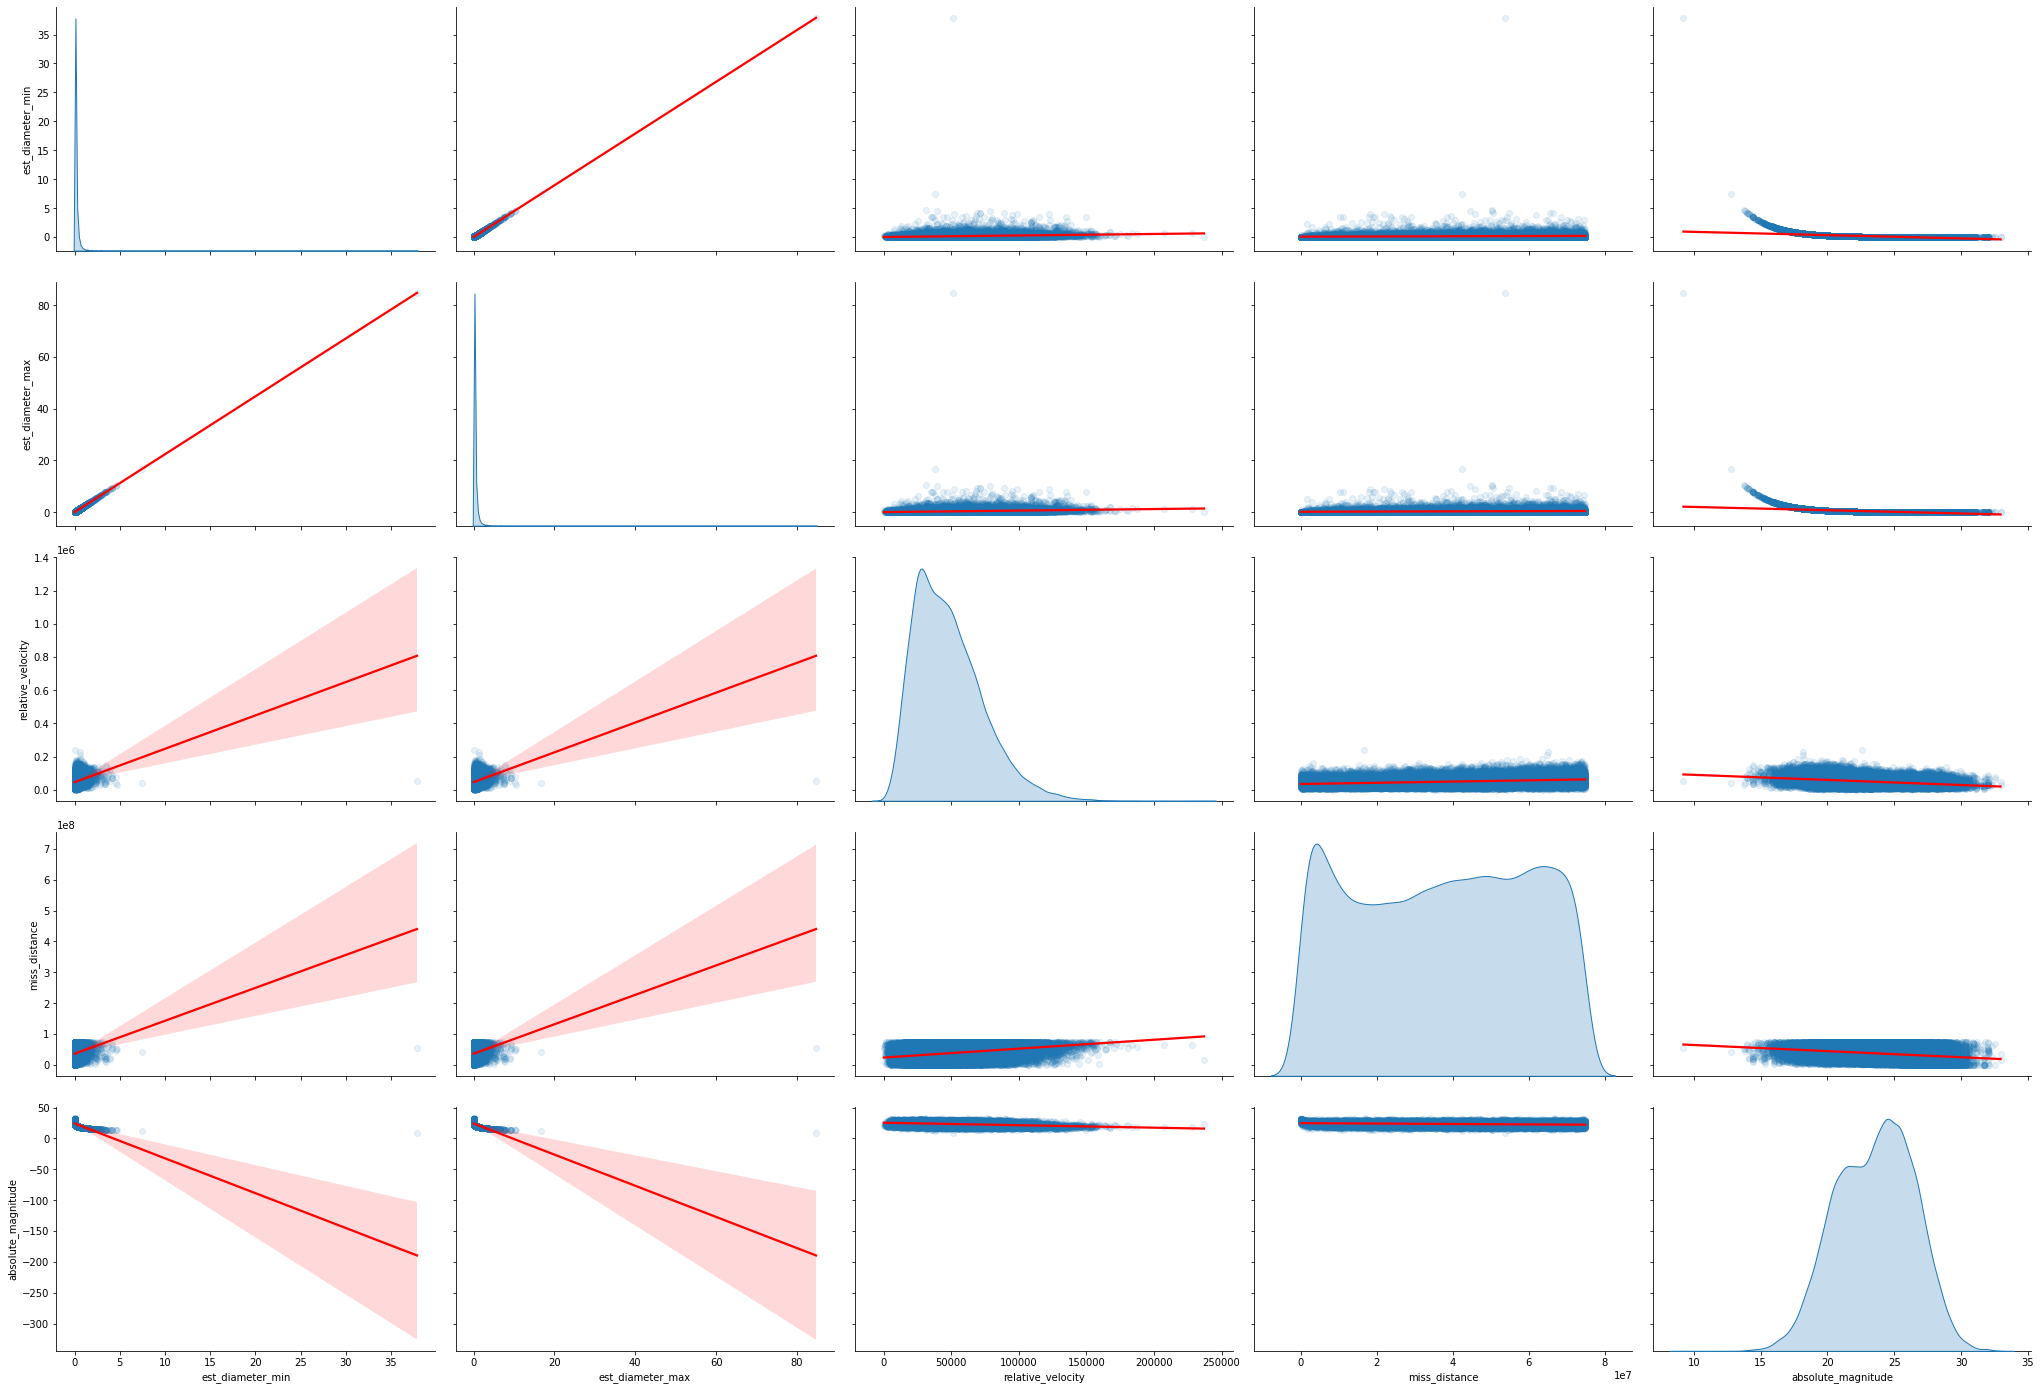

In [75]:
# Bivariate analysis with regression line added.
import seaborn as sns
bivariate_plt = sns.pairplot(X_train, diag_kind="kde", kind="reg",
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.1}})
bivariate_plt.fig.set_size_inches(30,20)

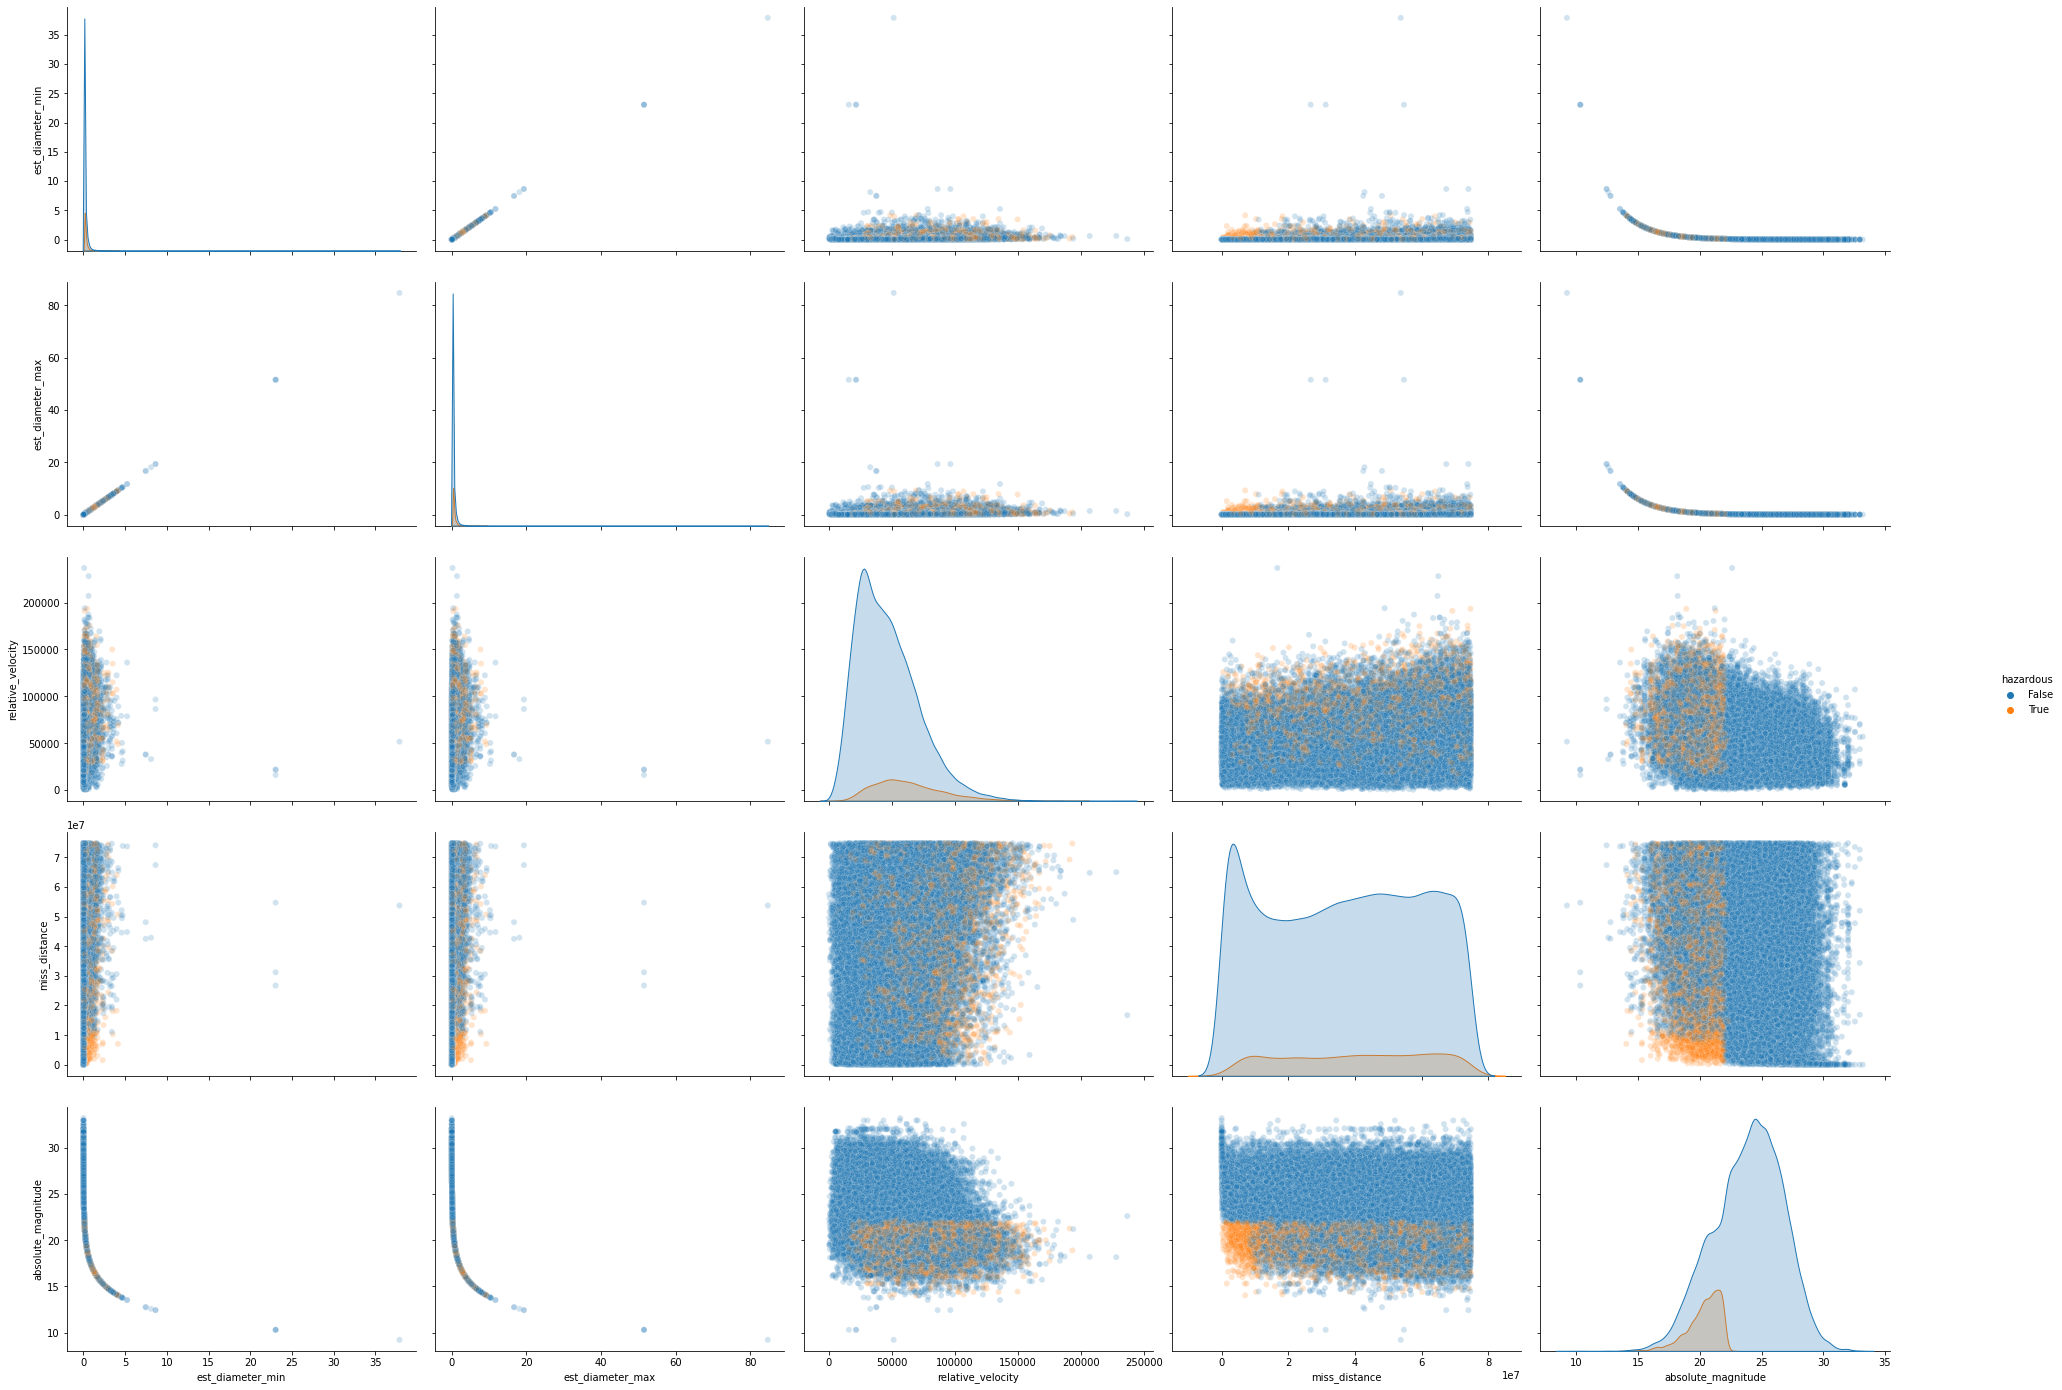

In [80]:
# Hazardous Quantity in each plot
fig = sns.pairplot(data[list(X_train) + ['hazardous']], hue='hazardous',
             plot_kws={'alpha':0.2})
fig.fig.set_size_inches(30,20)

In [ ]:
#logistic Regression 

In [ ]:
#Random Forest Classifier

In [ ]:
#KNN algorithm